In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import camb
from camb import model, initialpower
from classy import Class
from camb.dark_energy import DarkEnergyEqnOfState, EarlyQuintessence


In [15]:
#### CLASS LCDM PARAMS ####

LCDM_class_settings = {  'output':'tCl,pCl,lCl,mPk',
                   'lensing':'no',
                   'h':0.6821,
                   'omega_b':0.02253,
                   'omega_cdm':0.1177,
                   'A_s':2.216e-9, 
                   'n_s':0.9686,
                   'tau_reio':0.085,
                   'm_ncdm': 0.06,
                   'N_ncdm':1, 
                   'N_ur':2.0328,
                   'l_max_scalars':5000}


LCDM_class = Class()
LCDM_class.set(LCDM_class_settings)
LCDM_class.compute()


In [16]:
#### CLASS LCDM SPECTRA ####

clLCDM_class=LCDM_class.raw_cl()
clell_class = clLCDM_class.get("ell")
clTTLCDM_class = clLCDM_class.get("tt")
clEELCDM_class = clLCDM_class.get("ee")
clTELCDM_class = clLCDM_class.get("te")


DellTTLCDM_class = (2.7255e6)**2*np.multiply(np.multiply(clell_class,clell_class+1),clTTLCDM_class)/(2*3.14)
DellTELCDM_class = (2.7255e6)**2*np.multiply(np.multiply(clell_class,clell_class+1),clTELCDM_class)/(2*3.14)
DellEELCDM_class = (2.7255e6)**2*np.multiply(np.multiply(clell_class,clell_class+1),clEELCDM_class)/(2*3.14)


In [17]:
#### CLASS EDE PARAMS ####


EDE_class_settings = {'h': .7219,
         'fEDE': 0.122,
         'log10z_c': 3.562,
         'thetai_scf': 2.83,
         'A_s': 2.215e-09,
         'n_s': 0.9889,
         'omega_b': 0.02253,
         'omega_cdm': 0.1306,
         'tau_reio': 0.072,
         'l_max_scalars':5000,
         'N_ncdm':1,
         'm_ncdm': 0.06,
         'N_ur':2.0328, 
         'Omega_Lambda':0.0, 
         'Omega_fld':0, 
         'Omega_scf':-1, 
         'n_scf':3, 
         'CC_scf':1, 
         'scf_parameters':'1, 1, 1, 1, 1, 0.0', 
         'scf_tuning_index':3, 
         'attractor_ic_scf':'no', 
         'output':'tCl pCl lCl mPk', 
         'lensing':'no'}

EDE_class = Class()
EDE_class.set(EDE_class_settings)
EDE_class.compute()

In [18]:
#### CLASS EDE SPECTRA ####

clEDE_class=EDE_class.raw_cl()
clell_class = clEDE_class.get("ell")
clTTEDE_class = clEDE_class.get("tt")
clEEEDE_class = clEDE_class.get("ee")
clTEEDE_class = clEDE_class.get("te")


DellTTEDE_class = (2.7255e6)**2*np.multiply(np.multiply(clell_class,clell_class+1),clTTEDE_class)/(2*3.14)
DellTEEDE_class = (2.7255e6)**2*np.multiply(np.multiply(clell_class,clell_class+1),clTEEDE_class)/(2*3.14)
DellEEEDE_class = (2.7255e6)**2*np.multiply(np.multiply(clell_class,clell_class+1),clEEEDE_class)/(2*3.14)

In [19]:
LMAX = clell_class.shape[0] -1

In [20]:
#### CAMB LCDM PARAMS ####

pars_LCDM_camb = camb.CAMBparams()
pars_LCDM_camb.set_cosmology(H0=68.21, ombh2=0.02253, omch2=0.1177, mnu=0.06, omk=0, tau=0.085, standard_neutrino_neff=3.046)
pars_LCDM_camb.InitPower.set_params(As=2.216e-9, ns=0.9686, r=0)
pars_LCDM_camb.set_for_lmax(5000, max_eta_k=20000) 
pars_LCDM_camb.set_accuracy(AccuracyBoost=1, lAccuracyBoost=1, lSampleBoost=1, DoLateRadTruncation=False )

results_LCDM_camb = camb.get_results(pars_LCDM_camb)



In [21]:
#### CAMB LCDM SPECTRA ####
powers_LCDM_camb = results_LCDM_camb.get_cmb_power_spectra(pars_LCDM_camb, CMB_unit='muK')
clLCDM_camb = powers_LCDM_camb['unlensed_scalar']
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
clell_camb = np.arange(clell_class.shape[0])
clTTLCDM_camb = clLCDM_camb[:LMAX+1,0]
clEELCDM_camb = clLCDM_camb[:LMAX+1,1]
clTELCDM_camb = clLCDM_camb[:LMAX+1,3]


DellTTLCDM_camb = clTTLCDM_camb#1e12*np.multiply(np.multiply(clell_camb,clell_camb+1),clTTLCDM_camb)/(2*3.14)
DellTELCDM_camb = clTELCDM_camb#1e12*np.multiply(np.multiply(clell_camb,clell_camb+1),clTELCDM_camb)/(2*3.14)
DellEELCDM_camb = clEELCDM_camb#1e12*np.multiply(np.multiply(clell_camb,clell_camb+1),clEELCDM_camb)/(2*3.14)


In [30]:
#### CAMB EDE PARAMS ####

pars_EDE_camb = camb.CAMBparams()
pars_EDE_camb.set_cosmology(H0=72.19, ombh2=0.02253, omch2=0.1306, mnu=0.06, omk=0, tau=0.072, standard_neutrino_neff=3.046)
pars_EDE_camb.InitPower.set_params(As=2.216e-9, ns=0.9686, r=0)
pars_EDE_camb.set_for_lmax(5000, max_eta_k=20000) 
pars_EDE_camb.set_accuracy(AccuracyBoost=2, lAccuracyBoost=2, lSampleBoost=2, DoLateRadTruncation=False )

pars_EDE_camb.DarkEnergy = EarlyQuintessence(n=3, theta_i=2.83, fde_zc=0.122, min_steps_per_osc=1000,
                                             zc=10**(3.562), use_zc=False, npoints=5000)
results_EDE_camb = camb.get_results(pars_EDE_camb)



In [31]:
#### CAMB EDE SPECTRA #EDE
powers_EDE_camb = results_EDE_camb.get_cmb_power_spectra(pars_EDE_camb, CMB_unit='muK')
clEDE_camb = powers_EDE_camb['unlensed_scalar']
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
clell_camb = np.arange(clell_class.shape[0])
clTTEDE_camb = clEDE_camb[:LMAX+1,0]
clEEEDE_camb = clEDE_camb[:LMAX+1,1]
clTEEDE_camb = clEDE_camb[:LMAX+1,3]


DellTTEDE_camb = clTTEDE_camb#1e12*np.multiply(np.multiply(clell_camb,clell_camb+1),clTTLCDM_camb)/(2*3.14)
DellTEEDE_camb = clTEEDE_camb#1e12*np.multiply(np.multiply(clell_camb,clell_camb+1),clTELCDM_camb)/(2*3.14)
DellEEEDE_camb = clEEEDE_camb#1e12*np.multiply(np.multiply(clell_camb,clell_camb+1),clEELCDM_camb)/(2*3.14)

<ipython-input-32-715d3737c6b0>:11: RuntimeWarning: invalid value encountered in true_divide
  ax1.plot(clell_camb,(DellTTEDE_class-DellTTLCDM_class)/DellTTLCDM_class,c='k',lw=2.)
<ipython-input-32-715d3737c6b0>:25: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(clell_camb,(DellTTEDE_camb-DellTTLCDM_camb)/DellTTLCDM_camb,c='k',lw=2.)


Text(0, 0.5, '$ \\left(D_\\ell ^{\\rm TT LCDM, CLASS} - D_\\ell ^{\\rm TT LCDM, CAMB} \\right) ~ \\left/ ~ D_\\ell ^{\\rm TT LCDM, CAMB} \\right.$')

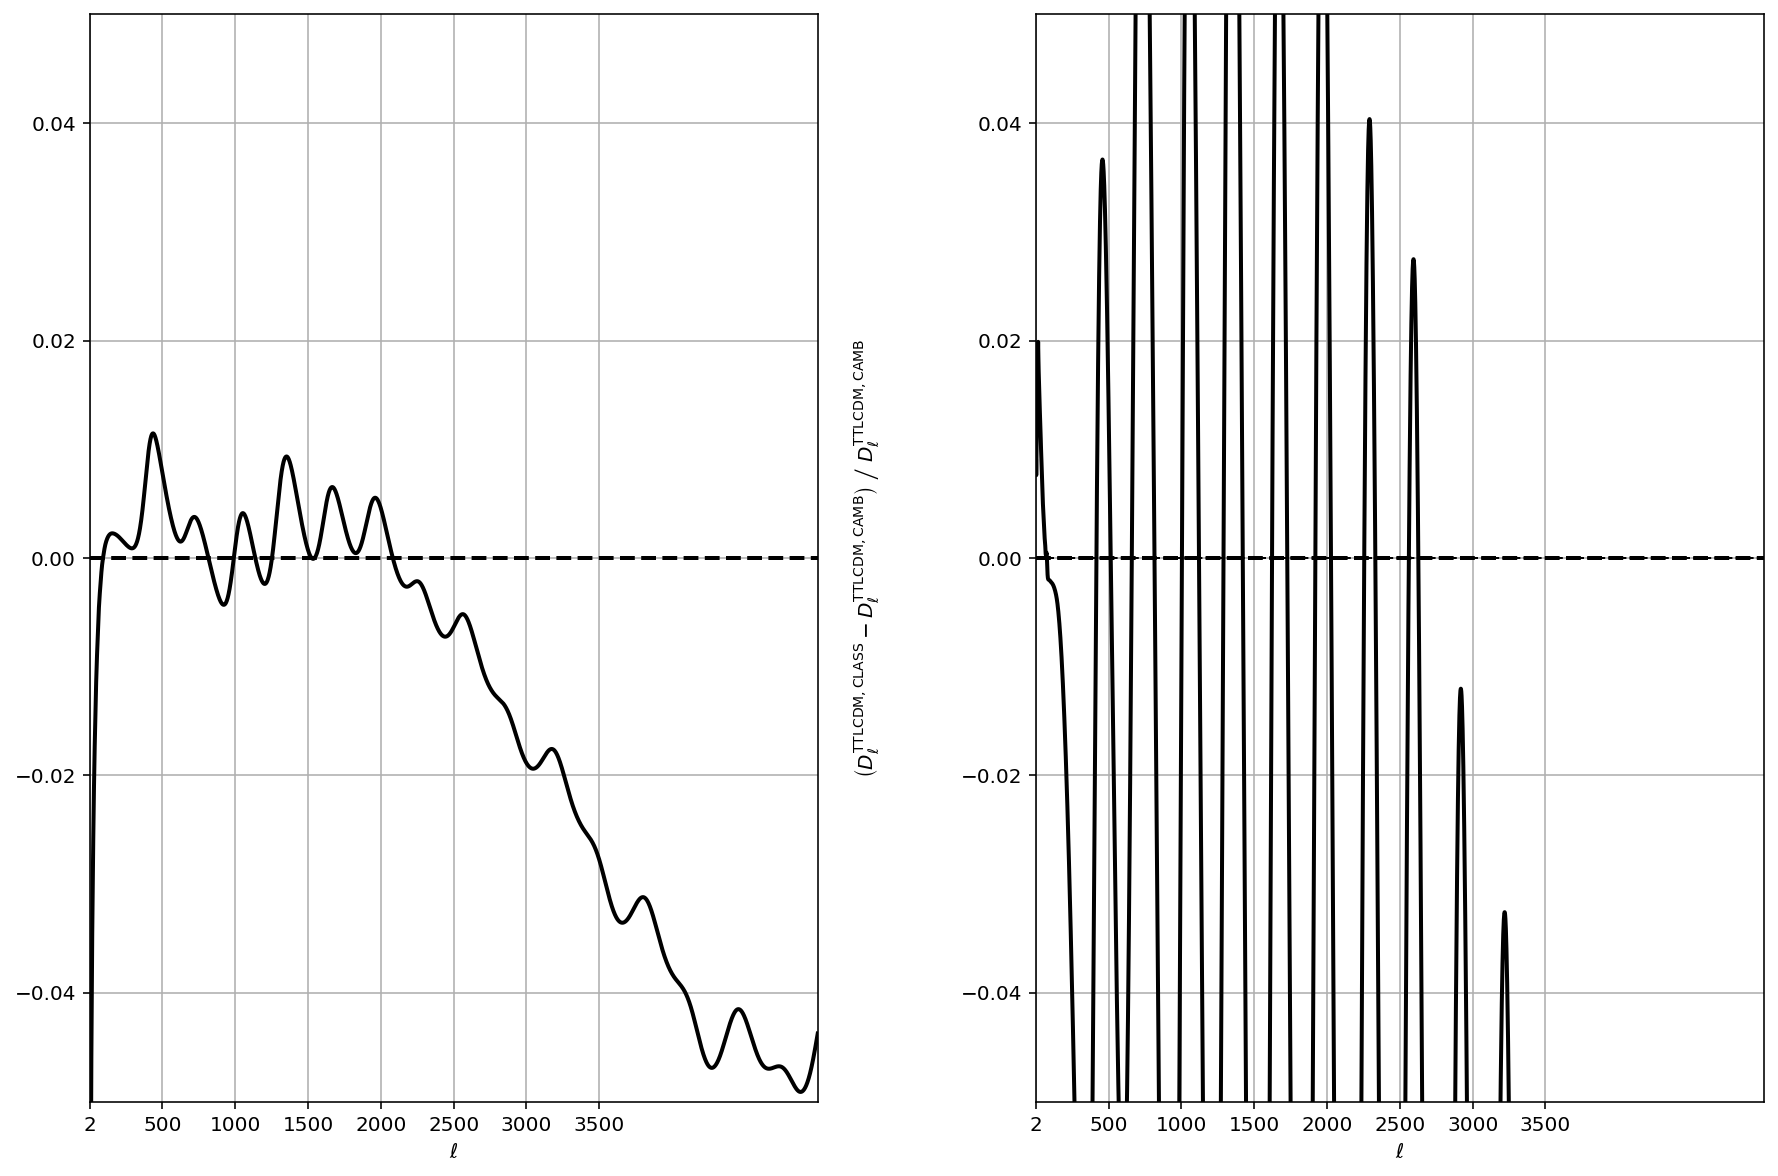

In [32]:
#### COMPARISON OF LCDM SPECTRA ####

pos = [2,500,1000,1500,2000,2500,3000,3500]

matplotlib.axis.YAxis.OFFSETTEXTPAD = 25

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

ax1.grid()
ax1.plot(clell_camb,(DellTTEDE_class-DellTTLCDM_class)/DellTTLCDM_class,c='k',lw=2.)
ax1.axhline(0,c='k',lw=2,ls='--')
# ax1.set_yscale('log')
ax1.set_ylim([-0.05,0.05])
ax1.set_xlim([2,5000])
# ax1.set_ylim([1e0,1e3])
ax1.set_xticks(pos)
ax1.set_xticklabels(pos)
ax1.set_xlabel(r'$\ell$')
ax2.set_ylabel(r'$ \left(D_\ell ^{\rm TT EDE, CLASS} - D_\ell ^{\rm TT LCDM, CLASS} \right) ~ \left/ ~ D_\ell ^{\rm TT LCDM, CLASS} \right.$',labelpad=40)#,fontsize=2LASSax1.legend()
ax2.grid()
ax2.set_xlim([2,5000])
ax2.set_ylim([-0.05,0.05])
ax2.axhline(0,c='k',lw=1,ls='--')
ax2.plot(clell_camb,(DellTTEDE_camb-DellTTLCDM_camb)/DellTTLCDM_camb,c='k',lw=2.)
ax2.axhline(0,c='k',lw=2,ls='--')
ax2.set_xticks(pos)
ax2.set_xticklabels(pos)
ax2.set_xlabel(r'$\ell$')
ax2.set_ylabel(r'$ \left(D_\ell ^{\rm TT LCDM, CLASS} - D_\ell ^{\rm TT LCDM, CAMB} \right) ~ \left/ ~ D_\ell ^{\rm TT LCDM, CAMB} \right.$',labelpad=40)#,fontsize=25)
# plt.savefig('../figures/CAMB-CLASS_TT.pdf')